# Visualisasi Menengah 1 

## di section ini kita akan belajar cara membuat word cloud dan waffle charts. selanjutnya kita akan mulai belajar tentang library visualisasi tambahan yang berbasis matplotlib, yaitu library seaborn, dan kita akan belajar cara membuat plot regresi menggunakan library seaborn

In [1]:
import numpy as np # useful for many scientif computing in python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [6]:
# masukkan dataset 

df_can = pd.read_excel('dataset/canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)

print('data downloaded and read into a dataframe !')

data downloaded and read into a dataframe !


In [7]:
# menampilkan dataset bagian 5 tabel teratas atau head

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# mencari tahu berapa banyak dimensi yang di kumpulkan oleh data kita

print(df_can.shape)

(195, 43)


In [13]:
df_can

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [11]:
'''
melakukan beberapa modifikasi pada dataset asli untuk 
mempermudah pembuatan visualisasi kita.
 basic visualisasization, line plots and area plots
histograms, bar plot
'''
# clean up the dataset to remove unnecessary columns
#df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName' : 'Country',
                         'AreaName' : 'Continent', 'Regname' : 'Region'}, inplace = True)

# for sake of consistensy, let's also make all columns label
df_can.columns = list(map(str, df_can.columns))

# set the country name as index
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum (axis = 1)

#year that we will be using in the lesson - useful for plotting
years = list(map(str, range (1980, 2014)))

print('data dimensions :', df_can.shape)

data dimensions : (195, 38)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9796\442571805.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


# Visualizing Data using Matplotlib

In [15]:
# masukkan library matplotlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #library untuk membuat waffle charts

mpl.style.use('ggplot') #style in matplotlib

#check version of matplotlib
print('Matplotlib verison : ', mpl.__version__)


Matplotlib verison :  3.5.1


## Waffle charts

### waffle charts adalah visualisasi menarik yang biasanya dibuat untuk menampilkan prograses menuju tujuan. waffle chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik dan terdiri dari sel seperti dasbor excel

In [16]:
# mari kita lihat kembalis tudi kasus sebelumnya tentang denmark, Norkwegia, dan swedia

df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :] # .loc untuk melihat value dari label yang kita ingin liat

df_dsn

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [17]:
'''
step 1 :
langkah pertama untuk membuat waffle adalah menentukan proporsi
setiap kategori sehubungan dengan totalnya
'''

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in
                       df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [19]:
'''
step 2 :
langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart
'''

width = 40 #width of chart
height = 10 #height of chart

total_num_tiles = width * height #total number of tiles

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


In [20]:
'''
step 3 :
langkah ketiga adalah menggunakan proporsi tiap kategori untuk
menentukan jumlah ubin masing masing kategori
'''

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ':' + str(tiles))


'''
berdasarkan proporsi yang dihitung, denmark akan menempati
129 ubin, norwegia akan menempati 77 ubin, dan swedia 
menempti 194 ubin 
'''

Denmark:129
Norway:77
Sweden:194


In [33]:
'''
step 4 :
langkah ke empat adalah membuat matriks yang menyerupai wafel dan
mengisinya 
'''
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles
        if tile_index > sum(tiles_per_category[0:category_index]):
            # proceed to the next category
            category_index += 1
        # set the class value to an integer, which increases with class
        waffle_chart[row,col] = category_index


print('Waffle chart populated!')

Waffle chart populated!


In [34]:
waffle_chart # untuk melihat tampilan matriks

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9796\2967118789.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

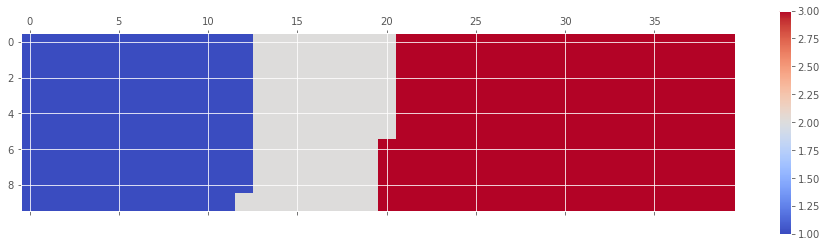

In [35]:
'''
step 5 :
petakan matriks waffle chart menjadi visual
'''

# instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9796\2196626172.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


([], [])

<Figure size 432x288 with 0 Axes>

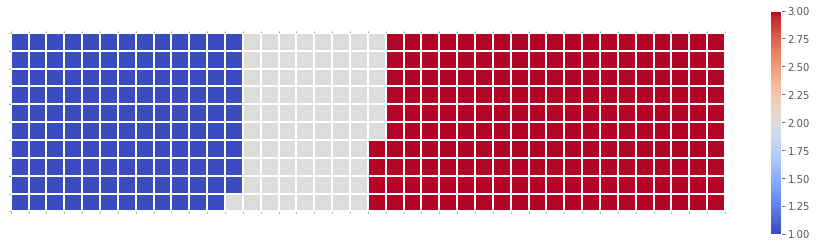

In [39]:
'''
step 6 :
percantik chart
'''

#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minur ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines base on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle ='-', linewidth = 2)

plt.xticks([])
plt.yticks([])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9796\2828259916.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

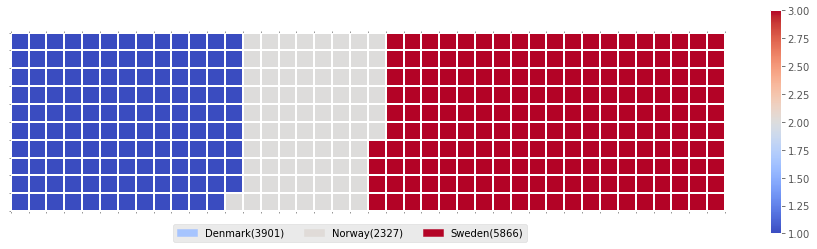

In [41]:
'''
step 7 :
tambahkan legend
'''
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minur ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines base on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle ='-', linewidth = 2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of individual categories to math color
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '('+ str(df_dsn['Total'][i]) +')'
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))


# add legend to chart
plt.legend(handles = legend_handles,
          loc = 'lower center',
          ncol = len(df_dsn.index.values),
          bbox_to_anchor = (0., -0.2, 0.95, .1))

In [42]:


def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [44]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9796\153457534.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

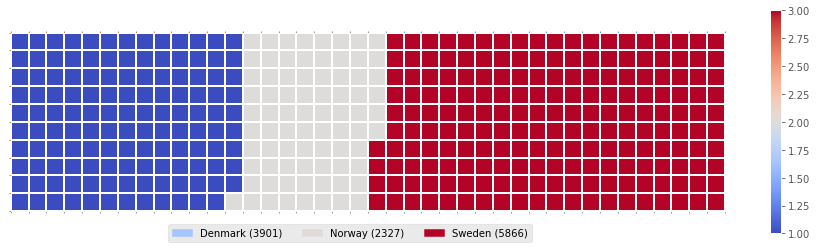

In [45]:
create_waffle_chart(categories, values, height, width, colormap)

# WORD CLOUDS

## Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana : semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

## untuknya sebuah package sudah ada di python untuk menghasilkan word clouds. package bernama word_cloud di kembangkan oleh andreas mueller


In [46]:
# pertama install packagenye 

!pip install wordcloud

#import pacakge nya 
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [50]:
# download file and install

alice_novel = open('dataset/alice_novel.txt').read()

print('File downloaded and saved')

File downloaded and saved


In [51]:
# memakai stopwords agar untuk menghapus stopword yang berlebihan

stopwords = set(STOPWORDS)

In [56]:
# buar word cloud dengan ringkas dan menggunakan 2000 kata
# pertama dalam novel

alice_wc = WordCloud(background_color = 'white', max_words = 2000, stopwords = stopwords)

alice_wc.generate(alice_novel)

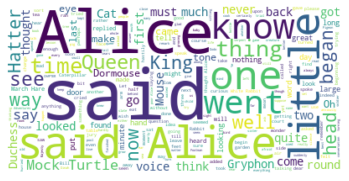

In [57]:
#display the word cloud

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

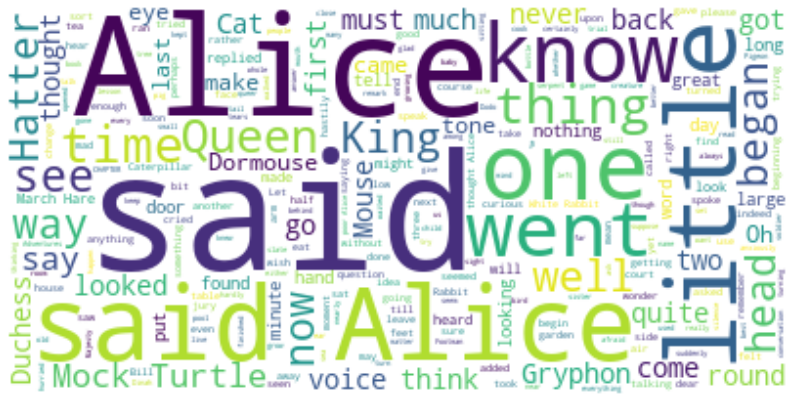

In [58]:
# merubah ukuran 

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()


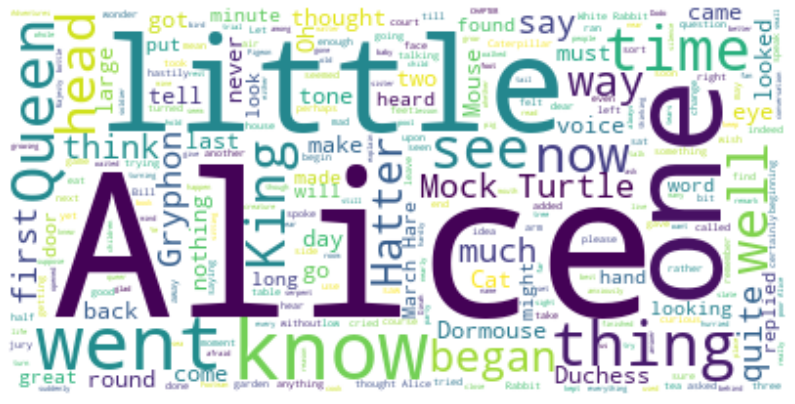

In [59]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
# save mask to alice_mask

alice_mask = np.array(Image.open('dataset/alice_mask.png'))

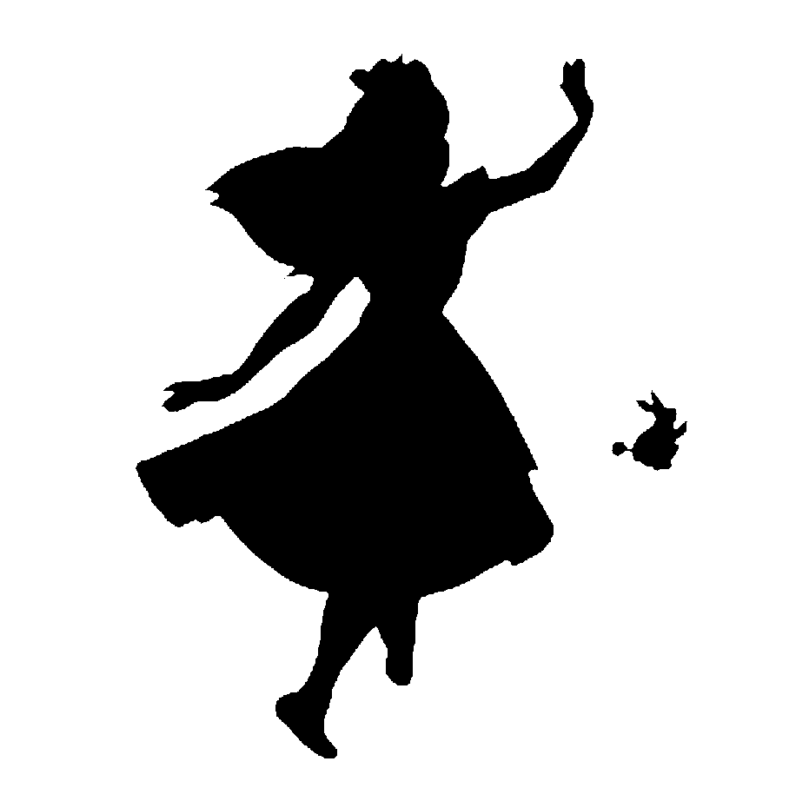

In [61]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

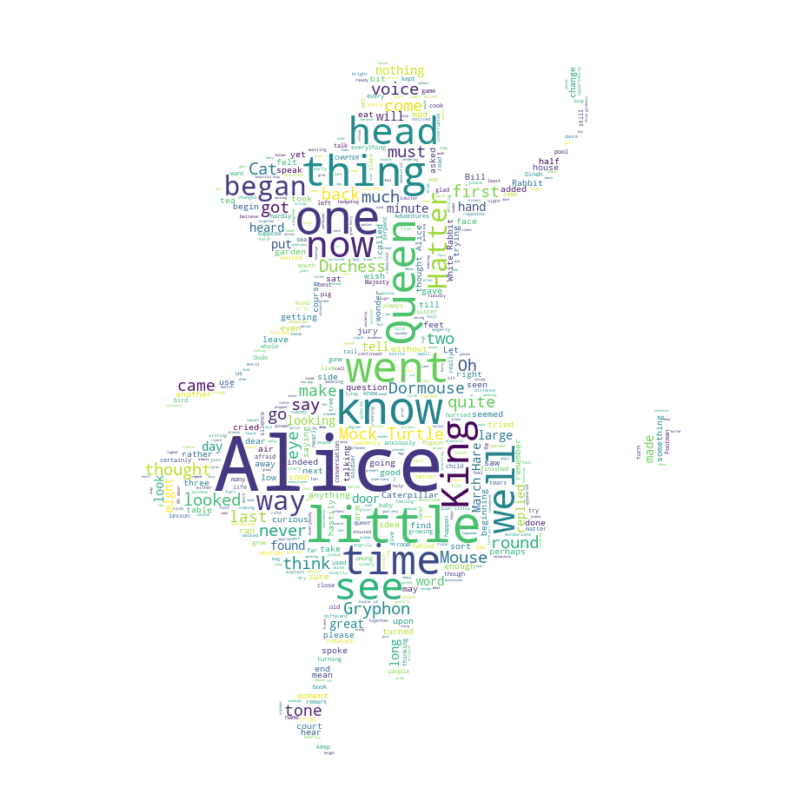

In [62]:
#memasukkan tulisan tadi ke dalam background hitam 

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
# Create word cloud based on how big the contribution of country for immigration

total_immigration = df_can['Total'].sum()

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [64]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


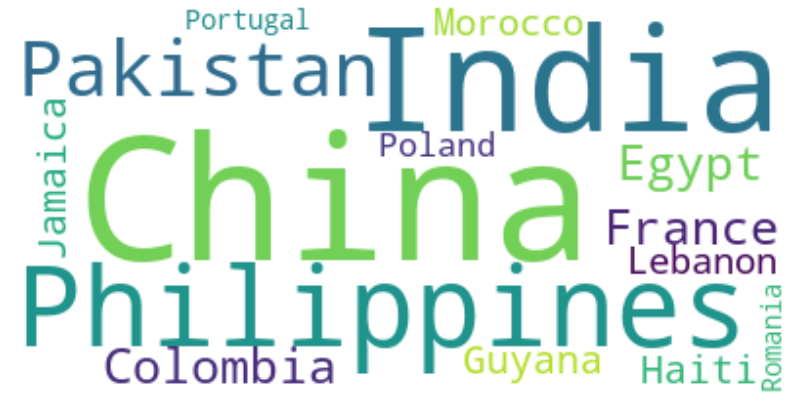

In [66]:
#display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression plots

In [67]:
# install package

!pip install seaborn

In [68]:
# import package

import seaborn as sns

print('Seaborn is ready!')

Seaborn is ready!


In [69]:
# Create a new dataframe contains sum of immigrant in year

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


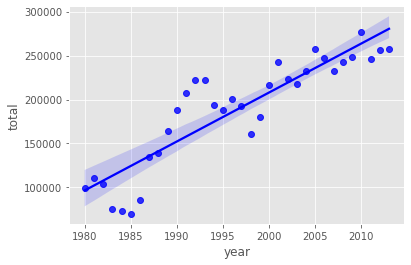

In [72]:
# regression plot

ax = sns.regplot(x='year', y='total', data=df_tot, color = 'blue')

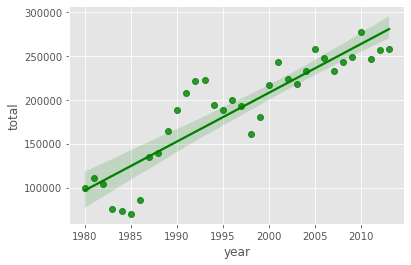

In [71]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

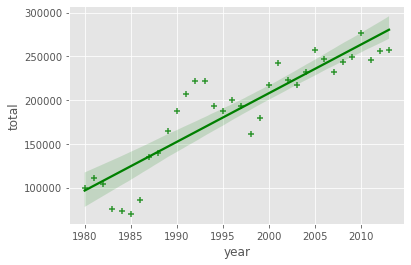

In [74]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

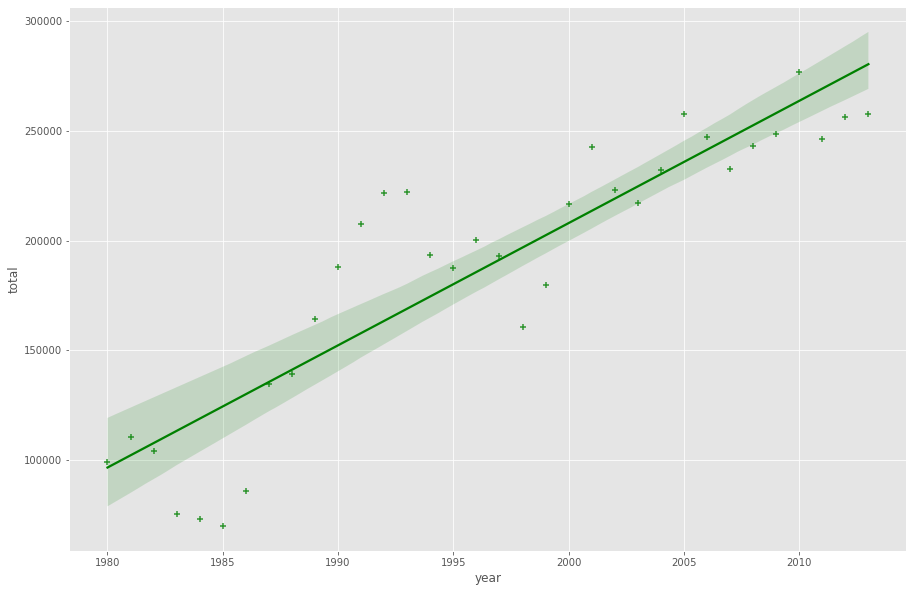

In [75]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

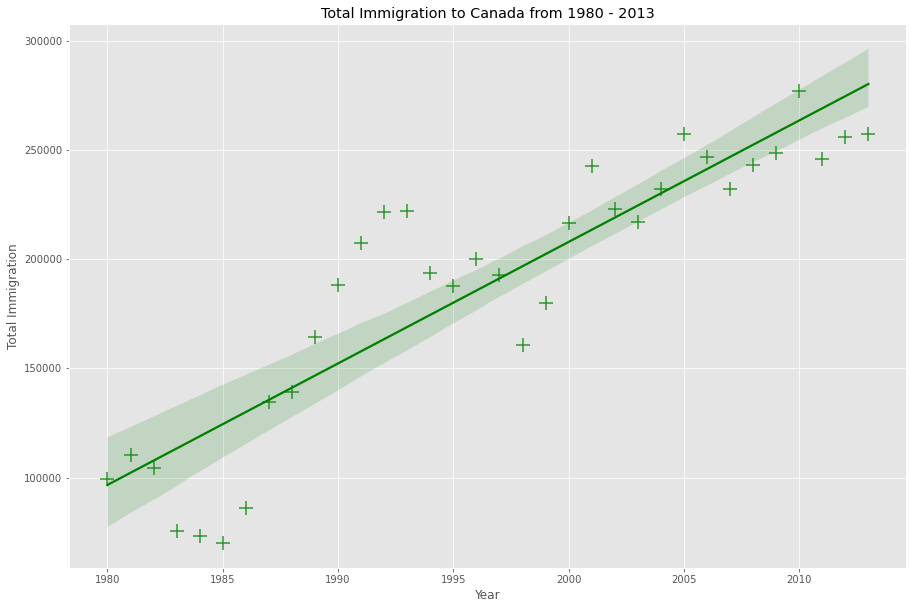

In [76]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

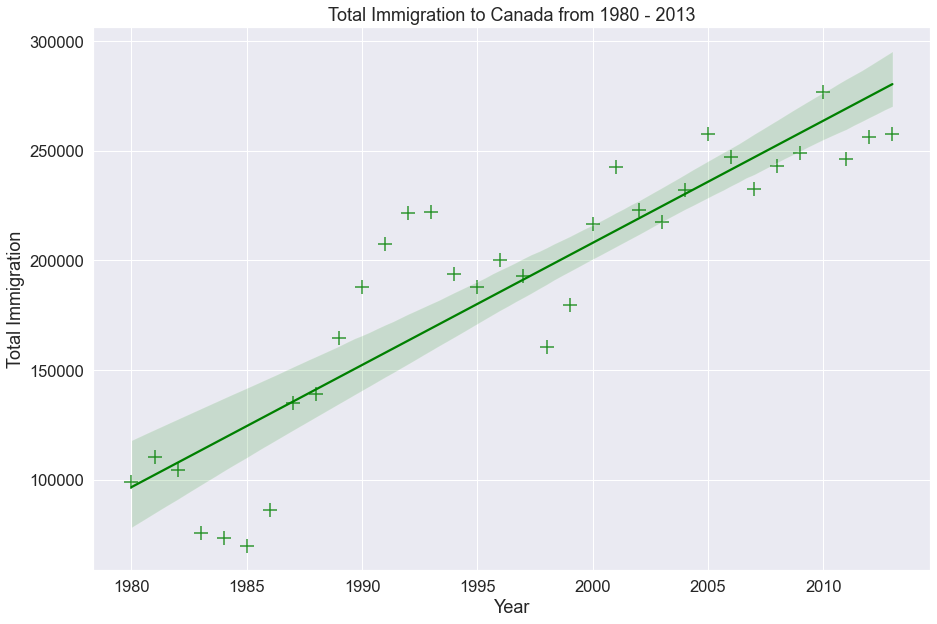

In [77]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

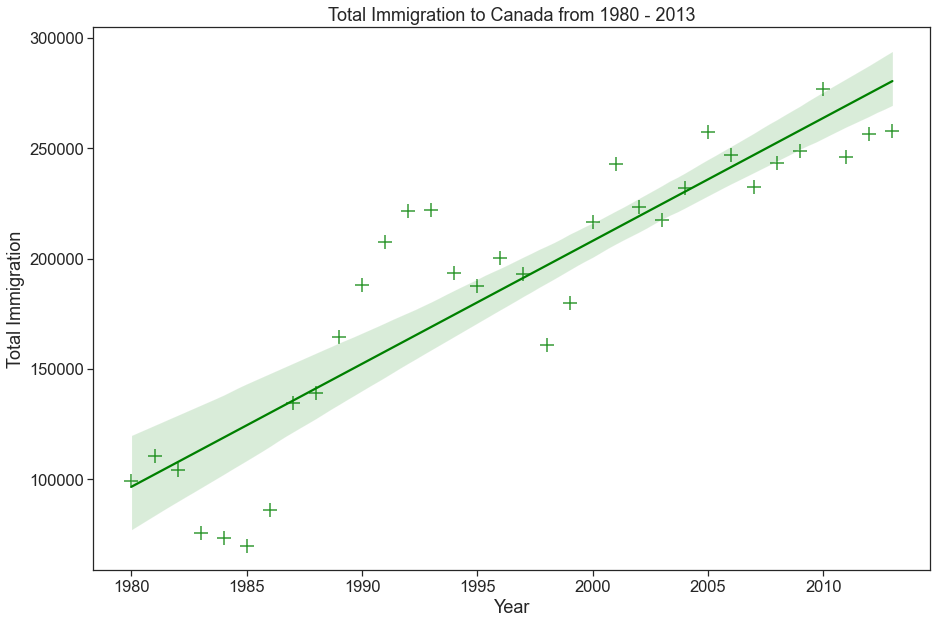

In [78]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

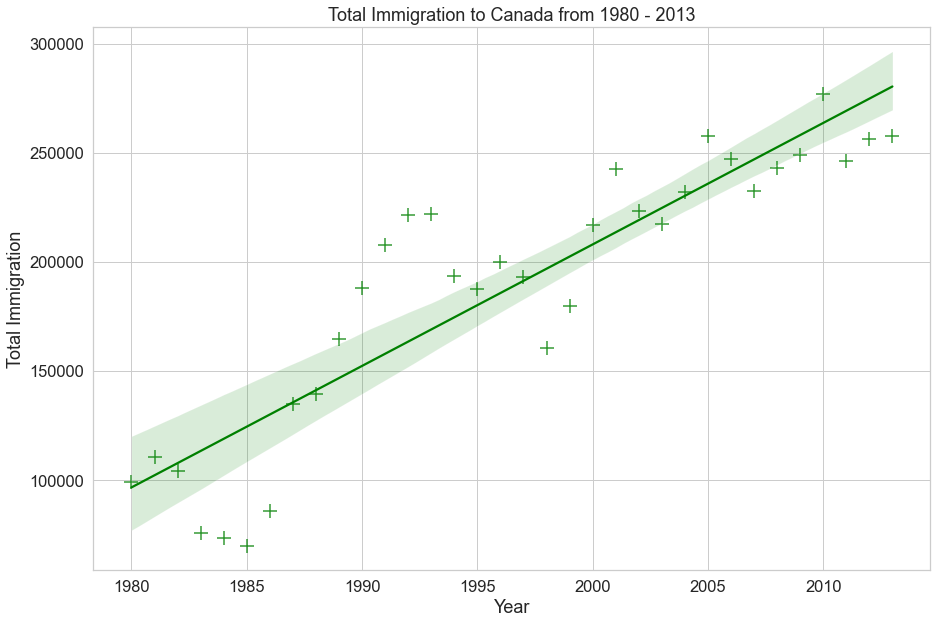

In [79]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

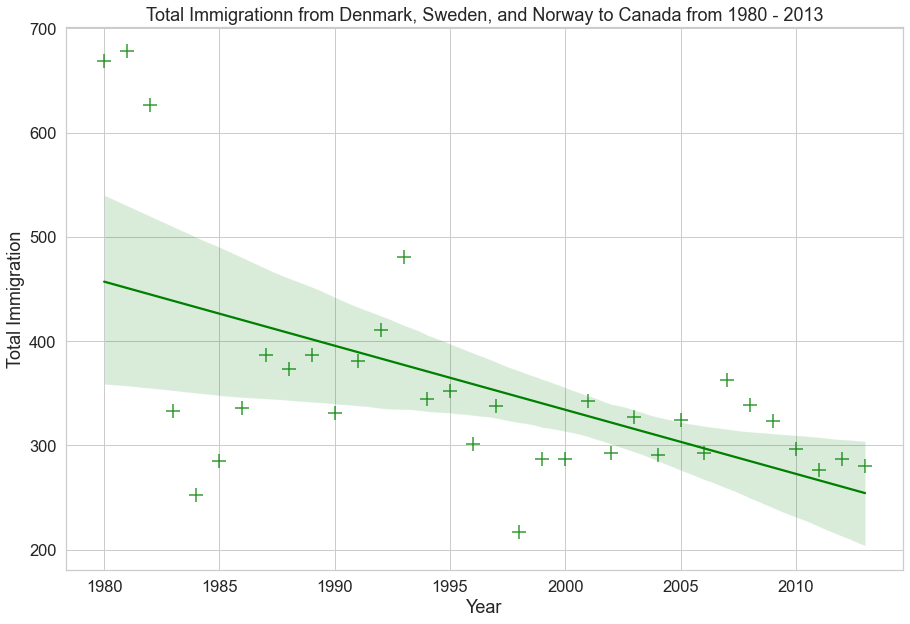

In [81]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# visualisasi menengah 2
## pada materi ini kita akan mempelajari cara membuat peta untuk berbagai tujuan, untuk melakukannya memakai library folium  dengan menvisualisasikan data geospasial

In [2]:
# pertama menginisialisasikan library numpy, pandas dan folium

#menginstall folium di dalam python
# !pip install folium #untuk menginstall folium
import folium
print('Folium installed and imported')

Folium installed and imported


In [48]:
'''
membuat peta duni sangat muda di folium, kalian cukup membuat
objek map folium dan kemudian menapilkannya. hal yang menarik
dari peta folium adalah peta tersebut interaktif, sehingga
kalian dapat memperbesar setiap wilayah yang diinginkan meskipun
pada tingkat zoom awal
'''

# define the world map
world_map = folium.Map() #format untuk membaca peta folium.Map

#display world map
world_map

In [9]:
'''
kalian dapat menyesuaikan difinisi default peta duni dengan
menentukan pusat peta kalian dan tingkat zoom awal

semua lokasi di peta di tentukan oleh nilai lintang dan bujurnya
masing masing. jadi kalian dapat membuat peta dan melewati di 
tengah nilai lintang dan bujur [0, 0]

untuk pusat yang ditentukan, kalian juga dapat menentukan tingkat
zoom awal kelokasi itu saat peta di render. semakin tinggi tingkat
peta semakin di perbesar ke tengah

mari buat peta yang berpusat di sekitar semarang dan mainkan
dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap
peta yang dibuat
'''

#memasukkan peta berdasarkan lintar dan bujur

word_map = folium.Map(location=[-6.992620, 110.428009], zoom_start = 8)
word_map

In [14]:
# mari buat peta lagi dengan tingkat zoom lebih tinggi 
word_map = folium.Map(location=[-6.992620, 110.428009], zoom_start = 11)
word_map

In [15]:
'''
Question 1 :
create a map of Hacktiv8 with a zoom level of 15
'''
world_map = folium.Map(location = [-6.2607187, 106.7794275], zoom_start = 15)
world_map

In [17]:
'''
fitur keren lainnya dari folium adalah kalian dapat menghasilkan
gaya peta yang berbeda

A. Stamen Toner Maps
   Stamen Toner adalah peta B + W (black and white) dengan kontras
   tinggi. Stamen Toner sempurna untuk data mashup dan menjelejahi
   kelokan sungai / river meanders dan zona pesisir / coastal zones

mari buat peta stamen toner semarang dengan tinggat zoom 13
'''

#create a Stamen Toner map of the world centered around semarang
world_map = folium.Map(location = [-6.9902851, 110.4207485], zoom_start = 13, tiles = 'Stamen Toner')
world_map

In [23]:
'''
B. Stamen Terrain Maps
   Stamen Terrain adalah peta yang menampilkan bayangan bukit dan
   warna vegetasi alami. Stamen Terrain menampilkan pelanbelan 
   lanjutan dan generalisasi garis dari jalan dengan dua jalur
   
   mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13
'''

world_map = folium.Map(location = [-6.9902851, 110.4207485], zoom_start = 13, tiles = 'Stamen Terrain')
world_map

# MAPS WITH MARKERS

In [24]:
'''
mari unduh dan import data police department incidents menggunakan
method pandas read_csv()
'''
df_incidents = pd.read_csv('dataset/Police_Department.csv')
print('Dataset download and read into a pandas dataframe')

Dataset download and read into a pandas dataframe


In [26]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000



Features:

1. IncidntNum: Incident Number
2. Category: Category of crime or incident
3. Descript: Description of the crime or incident
4. DayOfWeek: The day of week on which the incident occurred
5. Date: The Date on which the incident occurred
6. Time: The time of day on which the incident occurred
7. PdDistrict: The police department district
8. Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
9. Address: The closest address to where the incident took place
10. X: The longitude value of the crime location
11. Y: The latitude value of the crime location
12. Location: A tuple of the latitude and the longitude values
13. PdId: The police department ID

In [27]:
#  mari kita cari tahu berapa banyak entri di kumpulan data kita

df_incidents.shape

(150500, 13)

In [28]:
'''
jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi 
pada tahun 2016. untuk mengurangi computational cost, mari kita
bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini
'''

#get the first 100 crimes in the df_incidents dataframe / menentukan limit yang telah di tentukan 

limit = 100

df_incidents = df_incidents.iloc[0:limit, :]

In [29]:
# mari kita konfirmasikan bahwa dataframe kita sekarang hanya 
# terdiri dari 100 kejahatan

df_incidents.shape

(100, 13)

In [30]:
'''
sekarang setelah kita sedikit mengurangi datanya, mari kita 
visualisasikan dimana kejahatan terjadi di kota San Francisco
kita akan menggunakan gaya default dan kita akan menginisialisasikan
tingkat zoom ke 12
'''

# San Francisco latitude dan longitude values

latitude = 37.77
longitude = -122.42

#create map and display it
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
sanfran_map

In [36]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [37]:
'''
kalian juga dapat menambahkan beberapa teks pop up yang akan 
ditampilkan saat kalian mengarahkan kursor ke atas marker. 
mari buat setiap penanda menampilkan kategori kejahatan saat
diarahkan ke atas marker
'''
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

    
    
#add pop up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup = label).add_to(sanfran_map)
    
# add incidents to map
sanfran_map.add_child(incidents)

In [42]:
'''
sekarang kita dapat mengetahui kategori kejahatan apa yang telah
terjadi di setiap marker
jika kalian menyadari peta menjadi sangat padat akan semua marker
ini, ada dua solusi untuk masalah ini. solusi yang lebih sederhana
adalah dengan menghapus marker lokasi ini dan menambahkan teks
ke marker lingkaran itu sendiri sebgai berikut :
'''

# loop through the 100 crimes and add each to the map

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X,
                           df_incidents.Category) :
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'Yellow',
        popup = label,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(sanfran_map)

#showmap
sanfran_map

In [46]:
'''
solusi lain yang tepat adalah dengan mengelompokkan marker 
ke dalam cluster yang berbeda. setiap cluster kemudian 
diwakili oleh jumlah kejahatan di setiap lingkungan. cluster
ini dapat dianggap sebagai kantong dari kejahatan san fransisco
yang kemudian dapat kalian analisis secara terpisah.

untuk mengimplementasikannya. kita mulai dengan membuat instance
objek marker cluster dan menambahkan semua titik data di dataframe
ke objek ini
'''
from folium import plugins # menginisialisasikan library plugins di dalam folium

# let's start again with a clean copy of the map of san francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

#instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

#loop through the datafram and add each data point to the mark cluster
for lat, lng, label in zip(df_incidents.Y, df_incidents.X,
                          df_incidents.Category):
    folium.Marker(
    location = [lat, lng],
        icon =None,
        popup = label,
    ).add_to(incidents)


#display map
sanfran_map


# Choropleth Maps

In [49]:
'''
Peta choropleth adalah peta tematik dimana area diarsir atau 
berpola sebanding dengan pengukuran variable statistik yang 
ditampilkan di peta, seperti kepadataam penduduk atau pendapatan
perkapita.

di bawah ini adalah peta Choropleth AS yang menggabarkan populasi 
dengan mil persegi per negara bagian

pertama unduh dan import kumpulan data imigrasi kanada utama kita
sebelumnya menggunakan metode pandas read_excel()
'''

df_can = pd.read_excel('dataset/Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)

print('data downloaded and read into a dataframe')

data downloaded and read into a dataframe


In [50]:
df_can.head() #melihat data  lima item pertama dalam dataset

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [51]:
#  mari kita cari tahu beberapa banya entri masuk di kumpulan data kita
   df_can.shape

(195, 43)

In [52]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1332\2139836958.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [53]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
'''
untuk membuat peta choropleth, kita membutuhkan file GeoJSON yang
mendifinisikan area / batas negara bagian, kabupaten, atau negara
yang kita amati. dalam kasus ini kita berusaha untuk membuat
peta dunia, kita menginginkan sebuah GeoJSOn yang mendifinisikan
batas semua negara
'''


In [57]:
world_geo = r'dataset/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map